In [113]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import sqlite3


In [114]:
choco_df = pd.read_csv("choco.csv")
choco_df.head()

,energy_kcal,energy_kj,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nova_group,nutrition_score,fruits_veg_nuts_percent,brands,code,product_name
0,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.0,Sidi Ali,6111035000430,Sidi Ali
1,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.0,Jaouda,6111242100992,Perly
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0,sidi ali,6111035002175,Sidi Ali
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.0,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,Eau minérale naturelle
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.0,AQUAFINA,6111252421568,اكوافينا


In [115]:
choco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11997 entries, 0 to 11996
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   energy_kcal              11224 non-null  float64
 1   energy_kj                6440 non-null   float64
 2   carbohydrates            11222 non-null  float64
 3   sugars                   11017 non-null  float64
 4   fat                      11252 non-null  float64
 5   saturated_fat            10943 non-null  float64
 6   proteins                 11243 non-null  float64
 7   fiber                    8193 non-null   float64
 8   salt                     10918 non-null  float64
 9   sodium                   10918 non-null  float64
 10  nova_group               10734 non-null  float64
 11  nutrition_score          10309 non-null  float64
 12  fruits_veg_nuts_percent  11264 non-null  float64
 13  brands                   11345 non-null  object 
 14  code                  

In [116]:
choco_df.shape

(11997, 16)

In [117]:
choco_df.isnull().sum()

energy_kcal                 773
energy_kj                  5557
carbohydrates               775
sugars                      980
fat                         745
saturated_fat              1054
proteins                    754
fiber                      3804
salt                       1079
sodium                     1079
nova_group                 1263
nutrition_score            1688
fruits_veg_nuts_percent     733
brands                      652
code                          0
product_name                558
dtype: int64

In [118]:
choco_df.describe()

,energy_kcal,energy_kj,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nova_group,nutrition_score,fruits_veg_nuts_percent,code
count,11224.000000,6440.000000,11222.000000,11017.000000,11252.000000,10943.000000,11243.000000,8.193000e+03,10918.000000,10918.000000,10734.000000,10309.000000,11264.000000,1.199700e+04
mean,275.300280,1221.069544,29.150015,11.420398,14.551674,5.082198,7.044247,7.459102e+08,16.844300,6.737720,3.300447,8.965952,18.147445,4.533094e+12
std,210.624835,848.277823,89.121303,19.328032,20.985900,10.397607,9.266826,6.751620e+10,825.169048,330.067619,1.013192,9.772157,30.655871,2.400314e+12
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,-15.000000,-0.066406,1.816600e+04
25%,91.000000,419.000000,4.700000,1.000000,1.200000,0.300000,1.400000,5.000000e-01,0.050000,0.020000,3.000000,1.000000,0.000000,3.240932e+12
50%,241.000000,1190.000000,15.000000,4.100000,6.200000,1.400000,5.600000,2.500000e+00,0.375000,0.150000,4.000000,7.000000,0.144062,4.088600e+12
75%,433.000000,1873.000000,55.000000,13.000000,21.000000,6.000000,9.300000,5.500000e+00,1.000000,0.400000,4.000000,16.000000,21.287879,6.111184e+12
max,5280.000000,3768.000000,8989.000000,895.000000,607.000000,595.000000,597.000000,6.111242e+12,85000.000000,34000.000000,4.000000,51.000000,197.200000,9.780201e+12


In [119]:
((choco_df.isnull().sum()) / (len(choco_df))) * 100


energy_kcal                 6.443277
energy_kj                  46.319913
carbohydrates               6.459948
sugars                      8.168709
fat                         6.209886
saturated_fat               8.785530
proteins                    6.284905
fiber                      31.707927
salt                        8.993915
sodium                      8.993915
nova_group                 10.527632
nutrition_score            14.070184
fruits_veg_nuts_percent     6.109861
brands                      5.434692
code                        0.000000
product_name                4.651163
dtype: float64

In [120]:
choco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11997 entries, 0 to 11996
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   energy_kcal              11224 non-null  float64
 1   energy_kj                6440 non-null   float64
 2   carbohydrates            11222 non-null  float64
 3   sugars                   11017 non-null  float64
 4   fat                      11252 non-null  float64
 5   saturated_fat            10943 non-null  float64
 6   proteins                 11243 non-null  float64
 7   fiber                    8193 non-null   float64
 8   salt                     10918 non-null  float64
 9   sodium                   10918 non-null  float64
 10  nova_group               10734 non-null  float64
 11  nutrition_score          10309 non-null  float64
 12  fruits_veg_nuts_percent  11264 non-null  float64
 13  brands                   11345 non-null  object 
 14  code                  

In [121]:
choco_df.duplicated(subset=["code"]).sum()


np.int64(620)

In [122]:
chocolate = choco_df.drop_duplicates(subset=['code'], keep='first')


In [123]:
chocolate = chocolate.copy()

In [124]:
chocolate.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11377 entries, 0 to 11996
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   energy_kcal              10650 non-null  float64
 1   energy_kj                6110 non-null   float64
 2   carbohydrates            10650 non-null  float64
 3   sugars                   10461 non-null  float64
 4   fat                      10677 non-null  float64
 5   saturated_fat            10388 non-null  float64
 6   proteins                 10669 non-null  float64
 7   fiber                    7768 non-null   float64
 8   salt                     10358 non-null  float64
 9   sodium                   10358 non-null  float64
 10  nova_group               10172 non-null  float64
 11  nutrition_score          9792 non-null   float64
 12  fruits_veg_nuts_percent  10681 non-null  float64
 13  brands                   10753 non-null  object 
 14  code                     11

In [125]:
chocolate.duplicated(subset=["code"]).sum()

np.int64(0)

In [126]:
chocolate.describe(include='object')

,brands,product_name
count,10753,10849
unique,3882,9716
top,Hacendado,Tomato Ketchup
freq,325,20


In [127]:

chocolate['code'] = chocolate['code'].astype('category')


In [128]:
chocolate.describe(include='object')


,brands,product_name
count,10753,10849
unique,3882,9716
top,Hacendado,Tomato Ketchup
freq,325,20


In [129]:
chocolate.describe(include=['object', 'category'])



,brands,code,product_name
count,10753,11377,10849
unique,3882,11377,9716
top,Hacendado,9780201379624,Tomato Ketchup
freq,325,1,20


In [130]:
num_cols = chocolate.select_dtypes(include='number').columns.tolist()
num_cols

['energy_kcal',
 'energy_kj',
 'carbohydrates',
 'sugars',
 'fat',
 'saturated_fat',
 'proteins',
 'fiber',
 'salt',
 'sodium',
 'nova_group',
 'nutrition_score',
 'fruits_veg_nuts_percent']

In [131]:
num_cols.remove('nova_group')
num_cols

['energy_kcal',
 'energy_kj',
 'carbohydrates',
 'sugars',
 'fat',
 'saturated_fat',
 'proteins',
 'fiber',
 'salt',
 'sodium',
 'nutrition_score',
 'fruits_veg_nuts_percent']

In [132]:
len(num_cols)

12

In [133]:
df_clean = chocolate.dropna(subset=num_cols, how='all')



In [134]:
choco_df.shape


(11997, 16)

In [135]:
chocolate.shape

(11377, 16)

In [136]:
df_clean.shape

(11050, 16)

In [137]:
df_clean.isnull().sum()

energy_kcal                 400
energy_kj                  4940
carbohydrates               400
sugars                      589
fat                         373
saturated_fat               662
proteins                    381
fiber                      3282
salt                        692
sodium                      692
nova_group                  893
nutrition_score            1258
fruits_veg_nuts_percent     369
brands                      390
code                          0
product_name                345
dtype: int64

In [138]:
round((((df_clean.isnull().sum()) / (len(df_clean))) * 100),2)

energy_kcal                 3.62
energy_kj                  44.71
carbohydrates               3.62
sugars                      5.33
fat                         3.38
saturated_fat               5.99
proteins                    3.45
fiber                      29.70
salt                        6.26
sodium                      6.26
nova_group                  8.08
nutrition_score            11.38
fruits_veg_nuts_percent     3.34
brands                      3.53
code                        0.00
product_name                3.12
dtype: float64

In [139]:
# Drop energy_kj since it has too many missing values
df_clean = df_clean.drop(columns=['energy_kj'])
num_cols.remove('energy_kj')


In [140]:
df_clean.head()

,energy_kcal,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nova_group,nutrition_score,fruits_veg_nuts_percent,brands,code,product_name
0,0.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.0,Sidi Ali,6111035000430,Sidi Ali
1,97.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.0,Jaouda,6111242100992,Perly
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0,sidi ali,6111035002175,Sidi Ali
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.0,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,Eau minérale naturelle
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.0,AQUAFINA,6111252421568,اكوافينا


In [141]:
cat_cols = ['brands', 'product_name', 'nova_group']
cat_cols

['brands', 'product_name', 'nova_group']

In [142]:
df_clean = df_clean.dropna(subset=num_cols, how='all')
df_clean.shape

(11048, 15)

In [143]:
# Numeric columns → median imputation
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical columns → mode or 'Unknown'
for col in cat_cols:
    if col == 'nova_group':
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    else:
        df_clean[col] = df_clean[col].fillna('Unknown')

df_clean.isnull().sum()


energy_kcal                0
carbohydrates              0
sugars                     0
fat                        0
saturated_fat              0
proteins                   0
fiber                      0
salt                       0
sodium                     0
nova_group                 0
nutrition_score            0
fruits_veg_nuts_percent    0
brands                     0
code                       0
product_name               0
dtype: int64

In [144]:
df_clean[num_cols].describe()


,energy_kcal,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nutrition_score,fruits_veg_nuts_percent
count,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,1.104800e+04,11048.000000,11048.000000,11048.000000,11048.000000
mean,274.681796,28.736791,11.061573,14.332055,4.894743,6.983487,5.531537e+08,16.185587,6.474235,8.781318,17.453640
std,207.411959,89.650439,19.022737,20.777024,10.254749,9.191654,5.814169e+10,819.901926,327.960770,9.232950,30.215224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-15.000000,-0.066406
25%,95.000000,4.800000,1.100000,1.300000,0.300000,1.500000,1.200000e+00,0.060000,0.024000,2.000000,0.000000
50%,242.000000,15.100000,4.100000,6.300000,1.430000,5.600000,2.500000e+00,0.375000,0.150000,7.000000,0.125558
75%,426.360422,54.000000,12.000000,20.300000,5.500000,9.100000,3.900000e+00,0.980000,0.392000,15.000000,19.588125
max,5280.000000,8989.000000,895.000000,607.000000,595.000000,597.000000,6.111242e+12,85000.000000,34000.000000,51.000000,197.200000


In [145]:
for col in num_cols:
    skew = df_clean[col].skew()
    
    print(f"{col}: Skewness = {skew:.2f}")



energy_kcal: Skewness = 1.85
carbohydrates: Skewness = 90.45
sugars: Skewness = 11.43
fat: Skewness = 5.43
saturated_fat: Skewness = 19.47
proteins: Skewness = 25.52
fiber: Skewness = 105.11
salt: Skewness = 100.98
sodium: Skewness = 100.98
nutrition_score: Skewness = 0.65
fruits_veg_nuts_percent: Skewness = 1.77


In [146]:
df_clean['sugar_to_carb_ratio'] = np.where(df_clean['carbohydrates'] > 0, df_clean['sugars'] / df_clean['carbohydrates'], -1)


In [147]:
df_clean['calorie_category'] = pd.cut(df_clean['energy_kcal'], bins=[-np.inf,100,200,np.inf], labels=['Low','Moderate','High'])


In [148]:
df_clean['sugar_category'] = pd.cut(df_clean['sugars'], bins=[-np.inf,5,15,np.inf], labels=['Low Sugar','Moderate Sugar','High Sugar'])


In [149]:
df_clean['is_ultra_processed'] = df_clean['nova_group'].apply(lambda x: 'Yes' if x==4 else 'No')


In [150]:
df_clean['has_sugar'] = (df_clean['sugars'] > 0).astype(int)


In [151]:
df_clean.head()

,energy_kcal,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nova_group,nutrition_score,fruits_veg_nuts_percent,brands,code,product_name,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed,has_sugar
0,0.0,42.0,14.0,0.0,0.00,0.0,0.0,0.00000,0.000000,4.0,1.0,0.0,Sidi Ali,6111035000430,Sidi Ali,0.333333,Low,Moderate Sugar,Yes,1
1,97.0,9.4,4.1,3.0,1.43,8.0,2.5,0.37500,0.150000,3.0,7.0,0.0,Jaouda,6111242100992,Perly,0.436170,Low,Low Sugar,No,1
2,242.0,15.1,4.1,6.3,1.43,5.6,2.5,65.00000,26.000000,4.0,0.0,0.0,sidi ali,6111035002175,Sidi Ali,0.271523,High,Low Sugar,Yes,1
3,242.0,15.1,4.1,6.3,1.43,5.6,2.5,65.00000,26.000000,1.0,0.0,0.0,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,Eau minérale naturelle,0.271523,High,Low Sugar,No,1
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00508,0.002032,4.0,0.0,0.0,AQUAFINA,6111252421568,اكوافينا,-1.000000,Low,Low Sugar,Yes,0


<Axes: xlabel='is_ultra_processed', ylabel='count'>

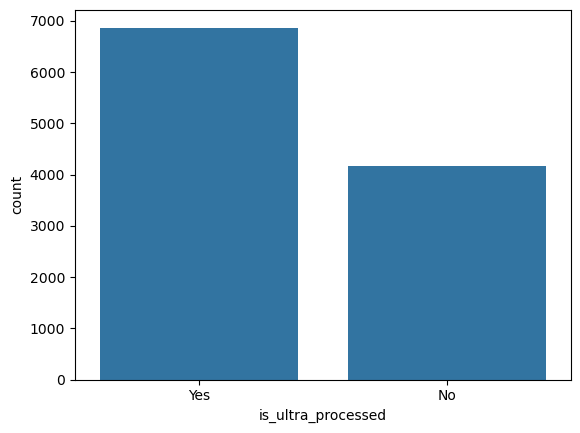

In [152]:
sns.countplot(x='is_ultra_processed', data=df_clean)

In [153]:
df_clean.describe()




,energy_kcal,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nova_group,nutrition_score,fruits_veg_nuts_percent,sugar_to_carb_ratio,has_sugar
count,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,1.104800e+04,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000,11048.000000
mean,274.681796,28.736791,11.061573,14.332055,4.894743,6.983487,5.531537e+08,16.185587,6.474235,3.360608,8.781318,17.453640,5.866977,0.915369
std,207.411959,89.650439,19.022737,20.777024,10.254749,9.191654,5.814169e+10,819.901926,327.960770,0.985885,9.232950,30.215224,494.588202,0.278344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,-15.000000,-0.066406,-1.000000,0.000000
25%,95.000000,4.800000,1.100000,1.300000,0.300000,1.500000,1.200000e+00,0.060000,0.024000,3.000000,2.000000,0.000000,0.071554,1.000000
50%,242.000000,15.100000,4.100000,6.300000,1.430000,5.600000,2.500000e+00,0.375000,0.150000,4.000000,7.000000,0.125558,0.387122,1.000000
75%,426.360422,54.000000,12.000000,20.300000,5.500000,9.100000,3.900000e+00,0.980000,0.392000,4.000000,15.000000,19.588125,0.898305,1.000000
max,5280.000000,8989.000000,895.000000,607.000000,595.000000,597.000000,6.111242e+12,85000.000000,34000.000000,4.000000,51.000000,197.200000,51250.000000,1.000000


In [154]:
df_clean['calorie_category'].value_counts()


calorie_category
High        6337
Low         2916
Moderate    1795
Name: count, dtype: int64

<Axes: xlabel='calorie_category', ylabel='count'>

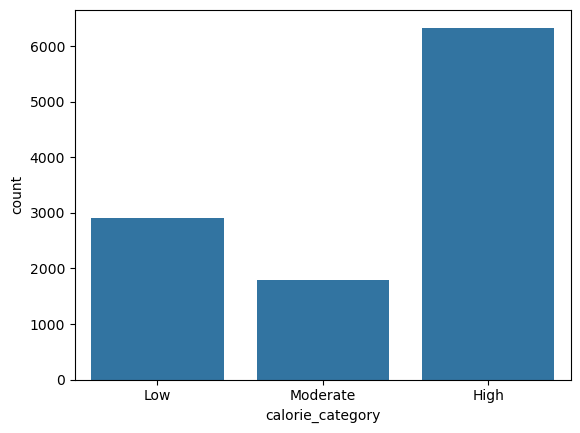

In [155]:
sns.countplot(x='calorie_category', data=df_clean)

In [156]:
df_clean['sugar_category'].value_counts()

sugar_category
Low Sugar         6571
High Sugar        2387
Moderate Sugar    2090
Name: count, dtype: int64

<Axes: xlabel='sugar_category', ylabel='count'>

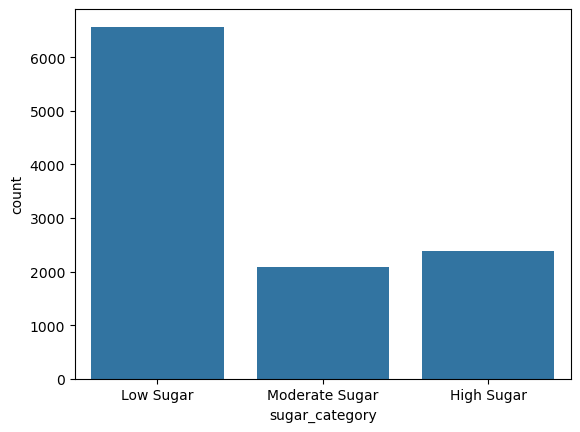

In [157]:
sns.countplot(x='sugar_category', data=df_clean)

In [158]:
df_clean.groupby('is_ultra_processed')[num_cols + ['sugar_to_carb_ratio']].mean()

,energy_kcal,carbohydrates,sugars,fat,saturated_fat,proteins,fiber,salt,sodium,nutrition_score,fruits_veg_nuts_percent,sugar_to_carb_ratio
is_ultra_processed,,,,,,,,,,,,
No,280.585496,25.761019,7.781477,16.334236,5.628394,8.080111,5.723981e+00,29.341372,11.736549,5.986836,25.216048,0.383790
Yes,271.091453,30.546511,13.056368,13.114426,4.448572,6.316574,8.895549e+08,8.184878,3.273951,10.480786,12.732921,9.201585


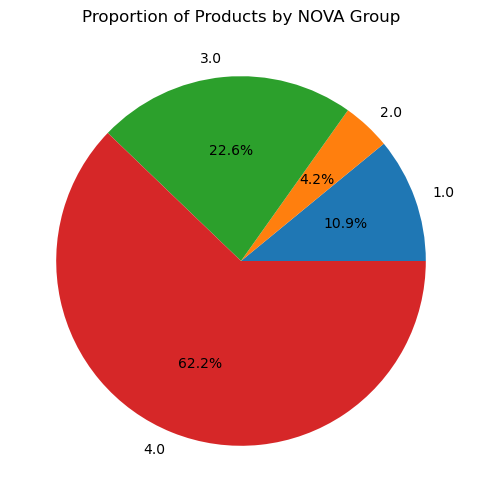

In [159]:


# Count the number of products in each nova_group
nova_counts = df_clean['nova_group'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(nova_counts, 
        labels=nova_counts.index,  # nova_group values
        autopct='%1.1f%%')       # show percentage
              

plt.title('Proportion of Products by NOVA Group')
plt.show()


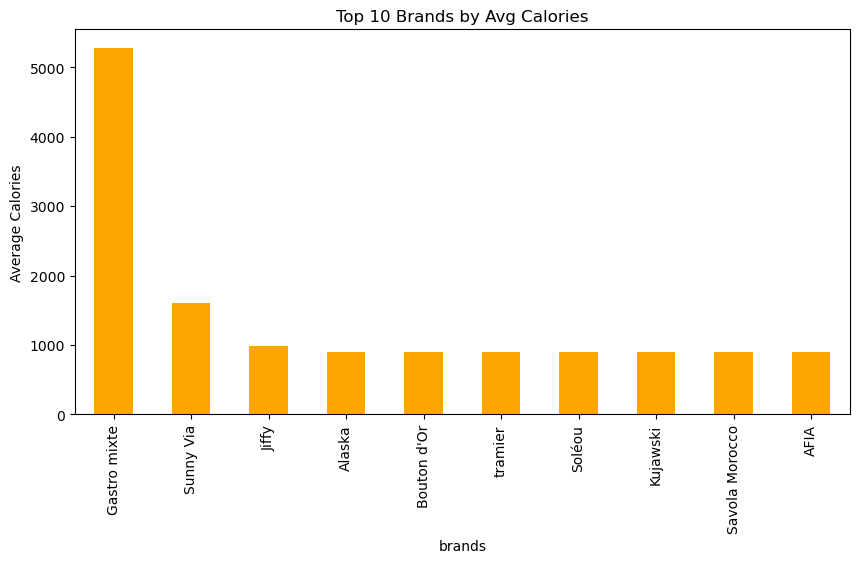

In [160]:
top_n = 10

# Calories
top_calories = df_clean.groupby('brands')['energy_kcal'].mean().sort_values(ascending=False).head(top_n)
top_calories.plot(kind='bar', figsize=(10,5), color='orange', title='Top 10 Brands by Avg Calories')
plt.ylabel('Average Calories')
plt.show()



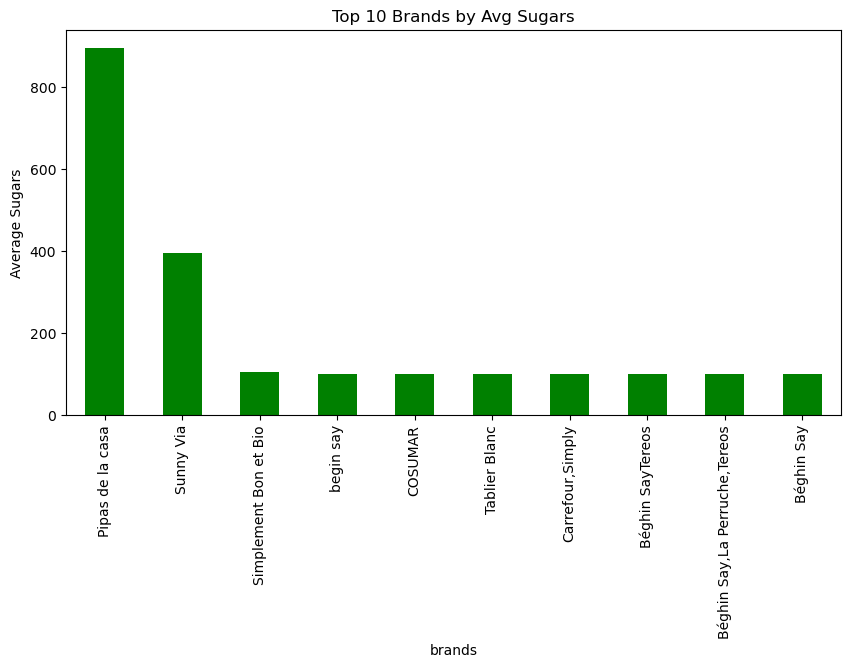

In [161]:
# Sugars
top_sugars = df_clean.groupby('brands')['sugars'].mean().sort_values(ascending=False).head(top_n)
top_sugars.plot(kind='bar', figsize=(10,5), color='green', title='Top 10 Brands by Avg Sugars')
plt.ylabel('Average Sugars')
plt.show()


In [162]:
df = df_clean.copy()

In [163]:
product_info = df[['code','product_name','brands']].drop_duplicates()

nutrient_cols = [
    'energy_kcal','carbohydrates','sugars','fat','saturated_fat',
    'proteins','fiber','salt','sodium','fruits_veg_nuts_percent',
    'nutrition_score','nova_group'
]
nutrient_info = df[['code'] + nutrient_cols].copy()

derived_metrics = df[['code','sugar_to_carb_ratio','calorie_category','sugar_category','is_ultra_processed']].copy()

In [164]:
engine = create_engine('sqlite:///chococrunch.db', echo=False)

product_info.to_sql('product_info', engine, if_exists='replace', index=False)
nutrient_info.to_sql('nutrient_info', engine, if_exists='replace', index=False)
derived_metrics.to_sql('derived_metrics', engine, if_exists='replace', index=False)


11048

In [165]:
con = sqlite3.connect('chococrunch.db')
print("product_info rows:", con.execute("SELECT COUNT(*) FROM product_info;").fetchone()[0])
print("nutrient_info rows:", con.execute("SELECT COUNT(*) FROM nutrient_info;").fetchone()[0])
print("derived_metrics rows:", con.execute("SELECT COUNT(*) FROM derived_metrics;").fetchone()[0])
con.close()

product_info rows: 11048
nutrient_info rows: 11048
derived_metrics rows: 11048


In [166]:
queries = {
    "Q01_total_products": """
        SELECT COUNT(*) AS total_products FROM product_info;
    """,

    "Q02_distinct_brands": """
        SELECT COUNT(DISTINCT brands) AS distinct_brands FROM product_info;
    """,

    "Q03_top10_brands_by_product_count": """
        SELECT brands AS brand, COUNT(*) AS product_count
        FROM product_info
        GROUP BY brands
        ORDER BY product_count DESC
        LIMIT 10;
    """,

    "Q04_products_per_nova_group": """
        SELECT nova_group, COUNT(*) AS cnt
        FROM nutrient_info
        GROUP BY nova_group
        ORDER BY nova_group;
    """,

    "Q05_avg_energy_overall": """
        SELECT ROUND(AVG(energy_kcal),2) AS avg_energy_kcal FROM nutrient_info;
    """,

    "Q06_top10_energy_products": """
        SELECT p.code, p.product_name, p.brands, n.energy_kcal
        FROM product_info p
        JOIN nutrient_info n ON p.code = n.code
        ORDER BY n.energy_kcal DESC
        LIMIT 10;
    """,

    "Q07_avg_sugars_per_nova": """
        SELECT n.nova_group, ROUND(AVG(n.sugars),2) AS avg_sugars, COUNT(*) AS cnt
        FROM nutrient_info n
        GROUP BY n.nova_group
        ORDER BY avg_sugars DESC;
    """,

    "Q08_products_sugars_gt_20": """
        SELECT p.code, p.product_name, p.brands, n.sugars
        FROM nutrient_info n
        JOIN product_info p ON p.code = n.code
        WHERE n.sugars > 20
        ORDER BY n.sugars DESC
        LIMIT 100;
    """,

    "Q09_count_fat_gt_20": """
        SELECT COUNT(*) AS cnt_fat_gt_20 FROM nutrient_info WHERE fat > 20;
    """,

    "Q10_avg_carbs_overall": """
        SELECT ROUND(AVG(carbohydrates),2) AS avg_carbohydrates FROM nutrient_info;
    """,

    "Q11_calorie_category_counts": """
        SELECT calorie_category, COUNT(*) AS cnt
        FROM derived_metrics
        GROUP BY calorie_category
        ORDER BY cnt DESC;
    """,

    "Q12_sugar_category_counts": """
        SELECT sugar_category, COUNT(*) AS cnt
        FROM derived_metrics
        GROUP BY sugar_category
        ORDER BY cnt DESC;
    """,

    "Q13_count_high_sugar_products": """
        SELECT COUNT(*) AS cnt_high_sugar FROM derived_metrics WHERE sugar_category = 'High Sugar';
    """,

    "Q14_avg_sugar_to_carb_ratio": """
        SELECT ROUND(AVG(sugar_to_carb_ratio),3) AS avg_ratio, COUNT(*) AS cnt
        FROM derived_metrics WHERE sugar_to_carb_ratio IS NOT NULL;
    """,

    "Q15_products_ratio_gt_0_7": """
        SELECT d.code, p.product_name, p.brands, d.sugar_to_carb_ratio
        FROM derived_metrics d
        JOIN product_info p ON p.code = d.code
        WHERE d.sugar_to_carb_ratio > 0.7
        ORDER BY d.sugar_to_carb_ratio DESC
        LIMIT 50;
    """,

    "Q16_avg_energy_by_calorie_category": """
        SELECT d.calorie_category, ROUND(AVG(n.energy_kcal),2) AS avg_energy, COUNT(*) AS cnt
        FROM derived_metrics d
        JOIN nutrient_info n ON d.code = n.code
        GROUP BY d.calorie_category;
    """,

    "Q17_avg_sugars_by_ultra_processed": """
        SELECT d.is_ultra_processed, ROUND(AVG(n.sugars),2) AS avg_sugars, COUNT(*) AS cnt
        FROM derived_metrics d
        JOIN nutrient_info n ON d.code = n.code
        GROUP BY d.is_ultra_processed;
    """,

    "Q18_top5_brands_by_avg_sugar": """
        SELECT p.brands AS brand, ROUND(AVG(n.sugars),2) AS avg_sugars, COUNT(*) AS cnt
        FROM product_info p
        JOIN nutrient_info n ON p.code = n.code
        GROUP BY p.brands
        HAVING COUNT(*) >= 5
        ORDER BY avg_sugars DESC
        LIMIT 5;
    """,

    "Q19_products_with_fruitsveg_by_cal_category": """
        SELECT d.calorie_category, COUNT(*) AS cnt_with_fv
        FROM derived_metrics d
        JOIN nutrient_info n ON d.code = n.code
        WHERE n.fruits_veg_nuts_percent > 0
        GROUP BY d.calorie_category;
    """,

    "Q20_high_cal_and_high_sugar_products": """
        SELECT p.brands, p.product_name, n.energy_kcal, n.sugars, d.calorie_category, d.sugar_category
        FROM product_info p
        JOIN nutrient_info n ON p.code = n.code
        JOIN derived_metrics d ON p.code = d.code
        WHERE d.calorie_category = 'High' AND d.sugar_category = 'High Sugar'
        ORDER BY n.energy_kcal DESC
        LIMIT 100;
    """,

    "Q21_count_ultra_processed": """
        SELECT is_ultra_processed, COUNT(*) AS cnt
        FROM derived_metrics
        GROUP BY is_ultra_processed;
    """,

    "Q22_top10_by_sugar_to_carb_ratio": """
        SELECT p.product_name, p.brands, d.sugar_to_carb_ratio, n.energy_kcal
        FROM derived_metrics d
        JOIN product_info p ON p.code = d.code
        JOIN nutrient_info n ON n.code = d.code
        ORDER BY d.sugar_to_carb_ratio DESC
        LIMIT 10;
    """,

    "Q23_min_max_nutrition_score": """
        SELECT MIN(nutrition_score) AS min_score, MAX(nutrition_score) AS max_score, ROUND(AVG(nutrition_score),2) AS avg_score
        FROM nutrient_info;
    """,

    "Q24_products_sodium_gt_1g": """
        SELECT p.code, p.product_name, p.brands, n.sodium
        FROM nutrient_info n
        JOIN product_info p ON p.code = n.code
        WHERE n.sodium > 1
        ORDER BY n.sodium DESC
        LIMIT 50;
    """,

    "Q25_count_products_with_fiber": """
        SELECT COUNT(*) AS cnt_with_fiber FROM nutrient_info WHERE fiber > 0;
    """,

    "Q26_top_brands_high_avg_energy": """
        SELECT p.brands AS brand, ROUND(AVG(n.energy_kcal),2) AS avg_energy, COUNT(*) AS cnt
        FROM product_info p
        JOIN nutrient_info n ON p.code = n.code
        GROUP BY p.brands
        HAVING COUNT(*) >= 5
        ORDER BY avg_energy DESC
        LIMIT 10;
    """,

    "Q27_sample_join_first_50": """
        SELECT p.code, p.product_name, p.brands, n.energy_kcal, n.sugars, d.sugar_to_carb_ratio, d.calorie_category, d.is_ultra_processed
        FROM product_info p
        LEFT JOIN nutrient_info n ON p.code = n.code
        LEFT JOIN derived_metrics d ON p.code = d.code
        LIMIT 50;
    """
}


In [167]:

import sqlite3
import os
from IPython.display import display

db_path = 'chococrunch.db'
out_dir = 'sql_query_outputs'
os.makedirs(out_dir, exist_ok=True)

conn = sqlite3.connect(db_path)

for name, sql in queries.items():
    try:
        df_res = pd.read_sql_query(sql, conn)
        csv_path = os.path.join(out_dir, f"{name}.csv")
        df_res.to_csv(csv_path, index=False)
        print(f"[OK] {name} — {len(df_res)} rows -> {csv_path}")
        display(df_res.head(6))
    except Exception as e:
        print(f"[ERROR] {name}: {e}")

conn.close()


[OK] Q01_total_products — 1 rows -> sql_query_outputs\Q01_total_products.csv


,total_products
0,11048


[OK] Q02_distinct_brands — 1 rows -> sql_query_outputs\Q02_distinct_brands.csv


,distinct_brands
0,3839


[OK] Q03_top10_brands_by_product_count — 10 rows -> sql_query_outputs\Q03_top10_brands_by_product_count.csv


,brand,product_count
0,Unknown,391
1,Hacendado,324
2,Tesco,254
3,Carrefour,140
4,Bjorg,93
5,Heinz,89


[OK] Q04_products_per_nova_group — 4 rows -> sql_query_outputs\Q04_products_per_nova_group.csv


,nova_group,cnt
0,1.0,1209
1,2.0,468
2,3.0,2501
3,4.0,6870


[OK] Q05_avg_energy_overall — 1 rows -> sql_query_outputs\Q05_avg_energy_overall.csv


,avg_energy_kcal
0,274.68


[OK] Q06_top10_energy_products — 10 rows -> sql_query_outputs\Q06_top10_energy_products.csv


,code,product_name,brands,energy_kcal
0,6111259090132,Pizzarella premium,Gastro mixte,5280.0
1,3088543506255,Sirop d'Agave,Sunny Via,1600.0
2,72486002205,Corn Muffin Mix,Jiffy,990.0
3,36000291452,penaut butter creamy,Alaska,904.0
4,6111099000599,Unknown,lio,900.0
5,6111024001516,Huile de table équilibrée riche en vitamines A...,Lesieur,900.0


[OK] Q07_avg_sugars_per_nova — 4 rows -> sql_query_outputs\Q07_avg_sugars_per_nova.csv


,nova_group,avg_sugars,cnt
0,2.0,16.81,468
1,4.0,13.06,6870
2,3.0,6.97,2501
3,1.0,5.96,1209


[OK] Q08_products_sugars_gt_20 — 100 rows -> sql_query_outputs\Q08_products_sugars_gt_20.csv


,code,product_name,brands,sugars
0,3400938267266,Unknown,Pipas de la casa,895.0
1,3088543506255,Sirop d'Agave,Sunny Via,395.0
2,26034461,Sirop d’agave,Simplement Bon et Bio,105.0
3,6111029000118,Cosumar Sucre En Lingot Pour Le Thé 1 kg,COSUMAR,100.0
4,6111029000293,enmer,كوسومار,100.0
5,3165433724019,Cassonade pure canne,Daddy,100.0


[OK] Q09_count_fat_gt_20 — 1 rows -> sql_query_outputs\Q09_count_fat_gt_20.csv


,cnt_fat_gt_20
0,2769


[OK] Q10_avg_carbs_overall — 1 rows -> sql_query_outputs\Q10_avg_carbs_overall.csv


,avg_carbohydrates
0,28.74


[OK] Q11_calorie_category_counts — 3 rows -> sql_query_outputs\Q11_calorie_category_counts.csv


,calorie_category,cnt
0,High,6337
1,Low,2916
2,Moderate,1795


[OK] Q12_sugar_category_counts — 3 rows -> sql_query_outputs\Q12_sugar_category_counts.csv


,sugar_category,cnt
0,Low Sugar,6571
1,High Sugar,2387
2,Moderate Sugar,2090


[OK] Q13_count_high_sugar_products — 1 rows -> sql_query_outputs\Q13_count_high_sugar_products.csv


,cnt_high_sugar
0,2387


[OK] Q14_avg_sugar_to_carb_ratio — 1 rows -> sql_query_outputs\Q14_avg_sugar_to_carb_ratio.csv


,avg_ratio,cnt
0,5.867,11048


[OK] Q15_products_ratio_gt_0_7 — 50 rows -> sql_query_outputs\Q15_products_ratio_gt_0_7.csv


,code,product_name,brands,sugar_to_carb_ratio
0,5000442007617,Frylight Sunflower Oil Spray 190ml,Frylight,51250.000000
1,41500007229,Mostassa groga clàssica,French's,8723.404255
2,20002329,Emmental Milbona,Milbona,41.000000
3,6111184003283,Assaisonnement au citron,Star,29.285714
4,8402001021428,"Gelatina 0% cereza, cola y sandía",HACENDADO,20.500000
5,8480000511263,Mozzarella,Hacendado,19.523810


[OK] Q16_avg_energy_by_calorie_category — 3 rows -> sql_query_outputs\Q16_avg_energy_by_calorie_category.csv


,calorie_category,avg_energy,cnt
0,High,415.55,6337
1,Low,49.06,2916
2,Moderate,143.89,1795


[OK] Q17_avg_sugars_by_ultra_processed — 2 rows -> sql_query_outputs\Q17_avg_sugars_by_ultra_processed.csv


,is_ultra_processed,avg_sugars,cnt
0,No,7.78,4178
1,Yes,13.06,6870


[OK] Q18_top5_brands_by_avg_sugar — 5 rows -> sql_query_outputs\Q18_top5_brands_by_avg_sugar.csv


,brand,avg_sugars,cnt
0,Saint louis,99.40,5
1,Daddy,95.00,7
2,Rowse,74.04,10
3,Lune de Miel,61.68,6
4,M&M's,55.90,5


[OK] Q19_products_with_fruitsveg_by_cal_category — 3 rows -> sql_query_outputs\Q19_products_with_fruitsveg_by_cal_category.csv


,calorie_category,cnt_with_fv
0,High,3150
1,Low,1661
2,Moderate,1049


[OK] Q20_high_cal_and_high_sugar_products — 100 rows -> sql_query_outputs\Q20_high_cal_and_high_sugar_products.csv


,brands,product_name,energy_kcal,sugars,calorie_category,sugar_category
0,Sunny Via,Sirop d'Agave,1600.00,395.00,High,High Sugar
1,Jiffy,Corn Muffin Mix,990.00,45.00,High,High Sugar
2,Pipas de la casa,Unknown,888.00,895.00,High,High Sugar
3,Rigoni di Asiago,Nocciolata Bianca,681.25,53.75,High,High Sugar
4,"Bio Village, Marque Repère",Chocolat noir dégustation 85% cacao bio,639.00,16.00,High,High Sugar
5,Marks & Spencer,Intense Dark Chocolate 85% Cocoa Solids,632.00,17.20,High,High Sugar


[OK] Q21_count_ultra_processed — 2 rows -> sql_query_outputs\Q21_count_ultra_processed.csv


,is_ultra_processed,cnt
0,No,4178
1,Yes,6870


[OK] Q22_top10_by_sugar_to_carb_ratio — 10 rows -> sql_query_outputs\Q22_top10_by_sugar_to_carb_ratio.csv


,product_name,brands,sugar_to_carb_ratio,energy_kcal
0,Frylight Sunflower Oil Spray 190ml,Frylight,51250.000000,1.0000
1,Mostassa groga clàssica,French's,8723.404255,0.0085
2,Emmental Milbona,Milbona,41.000000,370.0000
3,Assaisonnement au citron,Star,29.285714,1.1200
4,"Gelatina 0% cereza, cola y sandía",HACENDADO,20.500000,1.0000
5,Mozzarella,Hacendado,19.523810,60.9000


[OK] Q23_min_max_nutrition_score — 1 rows -> sql_query_outputs\Q23_min_max_nutrition_score.csv


,min_score,max_score,avg_score
0,-15.0,51.0,8.78


[OK] Q24_products_sodium_gt_1g — 50 rows -> sql_query_outputs\Q24_products_sodium_gt_1g.csv


,code,product_name,brands,sodium
0,3445850024023,Sel moulu de Guérande,Le Guérandais,34000.0
1,9352042000328,Vegemite,Bega,3300.0
2,3036810201280,Dijon Originale,MAILLE,2000.0
3,8801073110502,Artificial Spicy Chicken Flavor Ramen,Buldak,1630.0
4,3155250361825,President spreadable lightly salted,"Lactalis, Président",1300.0
5,6111005054081,Levure chimique en poudre,alsa,1287.0


[OK] Q25_count_products_with_fiber — 1 rows -> sql_query_outputs\Q25_count_products_with_fiber.csv


,cnt_with_fiber
0,9671


[OK] Q26_top_brands_high_avg_energy — 10 rows -> sql_query_outputs\Q26_top_brands_high_avg_energy.csv


,brand,avg_energy,cnt
0,Cauvin,900.00,5
1,Primadonna,825.33,6
2,Puget,752.75,8
3,Carapelli,743.50,8
4,Grand Fermage,736.80,5
5,Lesieur,734.00,15


[OK] Q27_sample_join_first_50 — 50 rows -> sql_query_outputs\Q27_sample_join_first_50.csv


,code,product_name,brands,energy_kcal,sugars,sugar_to_carb_ratio,calorie_category,is_ultra_processed
0,6111035000430,Sidi Ali,Sidi Ali,0.0,14.0,0.333333,Low,Yes
1,6111242100992,Perly,Jaouda,97.0,4.1,0.436170,Low,No
2,6111035002175,Sidi Ali,sidi ali,242.0,4.1,0.271523,High,Yes
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",242.0,4.1,0.271523,High,No
4,6111252421568,اكوافينا,AQUAFINA,0.0,0.0,-1.000000,Low,Yes
5,6111266962187,Lait,Jaouda,45.0,0.0,0.000000,Low,No


In [169]:
product_info = pd.read_csv("product_info.csv")

In [170]:
nutrient_info = pd.read_csv("nutrient_info.csv")

In [171]:
derived_metrics = pd.read_csv("derived_metrics.csv")

In [172]:
product_info = product_info[product_info['code'].notnull()].copy()


In [173]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11048 entries, 0 to 11047
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          11048 non-null  int64 
 1   product_name  11048 non-null  object
 2   brands        11048 non-null  object
dtypes: int64(1), object(2)
memory usage: 259.1+ KB


In [174]:
nutrient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11048 entries, 0 to 11047
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     11048 non-null  int64  
 1   energy_kcal              11048 non-null  float64
 2   carbohydrates            11048 non-null  float64
 3   sugars                   11048 non-null  float64
 4   fat                      11048 non-null  float64
 5   saturated_fat            11048 non-null  float64
 6   proteins                 11048 non-null  float64
 7   fiber                    11048 non-null  float64
 8   salt                     11048 non-null  float64
 9   sodium                   11048 non-null  float64
 10  fruits_veg_nuts_percent  11048 non-null  float64
 11  nutrition_score          11048 non-null  float64
 12  nova_group               11048 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.1 MB


In [175]:
derived_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11048 entries, 0 to 11047
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code                 11048 non-null  int64  
 1   sugar_to_carb_ratio  11048 non-null  float64
 2   calorie_category     11048 non-null  object 
 3   sugar_category       11048 non-null  object 
 4   is_ultra_processed   11048 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 431.7+ KB
